<a href="https://colab.research.google.com/github/vickykmwt/Loan-prediction-analysis-/blob/main/Loan_Prediction_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Import Modules**

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# **Loading The Dataset**

In [ ]:
df=pd.read_csv('/content/loan(2).csv')

In [ ]:
df

,age,gender,occupation,education_level,marital_status,income,credit_score,loan_status
0,32,Male,Engineer,Bachelor's,Married,85000,720,Approved
1,45,Female,Teacher,Master's,Single,62000,680,Approved
2,28,Male,Student,High School,Single,25000,590,Denied
3,51,Female,Manager,Bachelor's,Married,105000,780,Approved
4,36,Male,Accountant,Bachelor's,Married,75000,710,Approved
...,...,...,...,...,...,...,...,...
56,39,Male,Architect,Master's,Married,100000,770,Approved
57,25,Female,Receptionist,High School,Single,32000,570,Denied
58,43,Male,Banker,Bachelor's,Married,95000,760,Approved
59,30,Female,Writer,Master's,Single,55000,650,Approved


In [ ]:
df.head()

,age,gender,occupation,education_level,marital_status,income,credit_score,loan_status
0,32,Male,Engineer,Bachelor's,Married,85000,720,Approved
1,45,Female,Teacher,Master's,Single,62000,680,Approved
2,28,Male,Student,High School,Single,25000,590,Denied
3,51,Female,Manager,Bachelor's,Married,105000,780,Approved
4,36,Male,Accountant,Bachelor's,Married,75000,710,Approved


In [ ]:
df.describe()

,age,income,credit_score
count,61.000000,61.000000,61.000000
mean,37.081967,78983.606557,709.836066
std,8.424755,33772.025802,72.674888
min,24.000000,25000.000000,560.000000
25%,30.000000,52000.000000,650.000000
50%,36.000000,78000.000000,720.000000
75%,43.000000,98000.000000,770.000000
max,55.000000,180000.000000,830.000000


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 61 entries, 0 to 60
Data columns (total 8 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   age              61 non-null     int64 
 1   gender           61 non-null     object
 2   occupation       61 non-null     object
 3   education_level  61 non-null     object
 4   marital_status   61 non-null     object
 5   income           61 non-null     int64 
 6   credit_score     61 non-null     int64 
 7   loan_status      61 non-null     object
dtypes: int64(3), object(5)
memory usage: 3.9+ KB


# **Preprocessing The Dataset**

In [ ]:
df.isnull().sum()

,0
age,0
gender,0
occupation,0
education_level,0
marital_status,0
income,0
credit_score,0
loan_status,0


# **Exploratory Data Analysis**


<Axes: xlabel='count', ylabel='gender'>

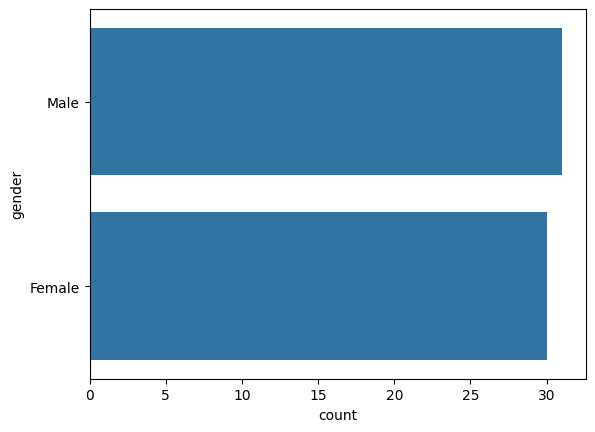

In [ ]:
sns.countplot(df['gender'])

<Axes: xlabel='count', ylabel='marital_status'>

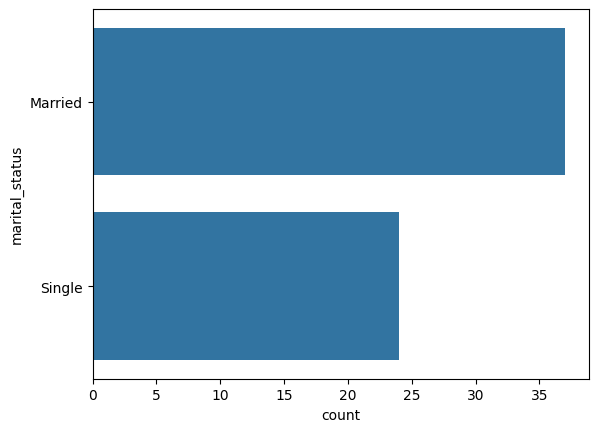

In [ ]:
sns.countplot(df['marital_status'])

<Axes: xlabel='count', ylabel='loan_status'>

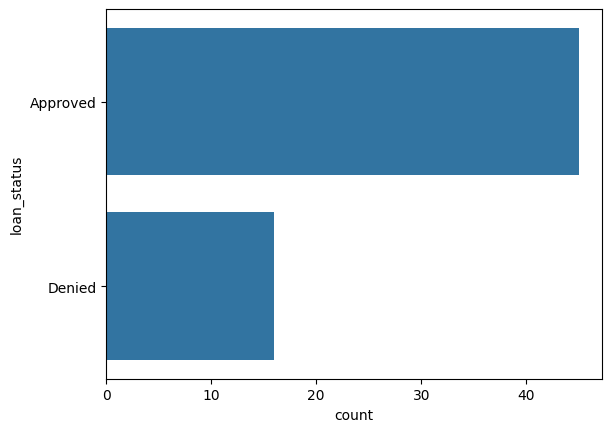

In [ ]:
sns.countplot(df['loan_status'])

<Axes: xlabel='count', ylabel='education_level'>

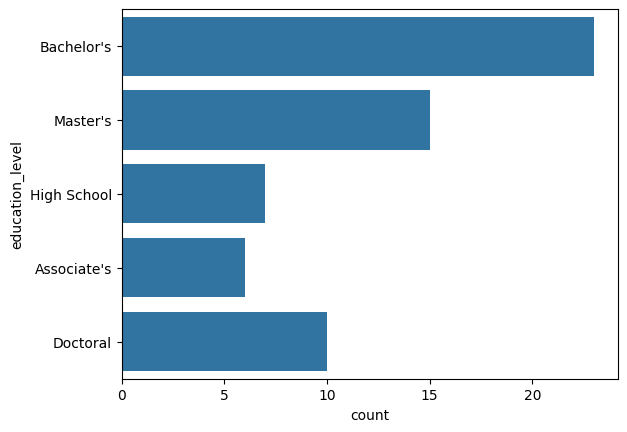

In [ ]:
sns.countplot(df['education_level'])

<ipython-input-26-65120153ab4f>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['income'])


<Axes: xlabel='income', ylabel='Density'>

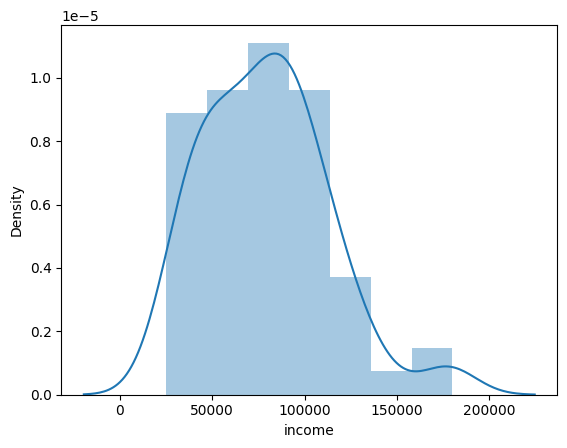

In [ ]:
sns.distplot(df['income'])

<ipython-input-27-4c19aed19269>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['credit_score'])


<Axes: xlabel='credit_score', ylabel='Density'>

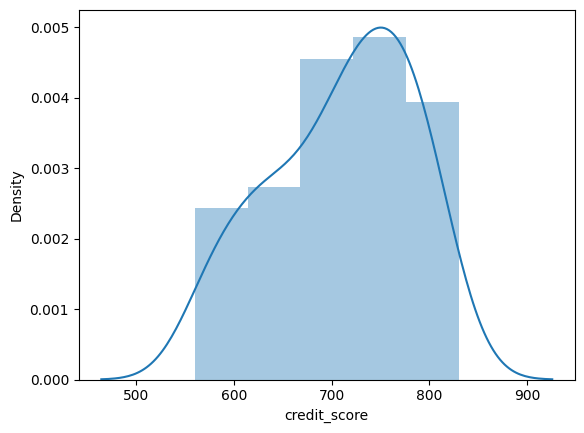

In [ ]:
sns.distplot(df['credit_score'])

# **Coorelation Matrix**

<Axes: >

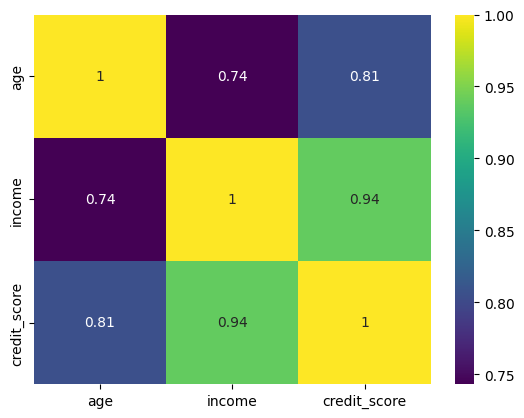

In [ ]:
corr = df.select_dtypes(include=np.number).corr()
sns.heatmap(corr, annot=True, cmap='viridis') # Changed cmap to 'viridis'

# **Label Encoding**

In [ ]:
from sklearn.preprocessing import LabelEncoder
cols = ['gender', 'marital_status', 'education_level', 'loan_status']
le = LabelEncoder()
for col in cols:
    df[col] = le.fit_transform(df[col])


In [ ]:
df.head()

,age,gender,occupation,education_level,marital_status,income,credit_score,loan_status
0,32,1,Engineer,1,0,85000,720,0
1,45,0,Teacher,4,1,62000,680,0
2,28,1,Student,3,1,25000,590,1
3,51,0,Manager,1,0,105000,780,0
4,36,1,Accountant,1,0,75000,710,0


# **Min-Max scalling**

In [ ]:
# prompt: min max saclling

import pandas as pd
from sklearn.preprocessing import MinMaxScaler

# Assuming X_train and X_test are your feature dataframes

# Create a MinMaxScaler instance
scaler = MinMaxScaler()

# Fit the scaler on the training data
scaler.fit(X_train)

# Transform both training and testing data
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Convert the scaled data back to DataFrames (optional, but recommended)
X_train_scaled = pd.DataFrame(X_train_scaled, columns=X_train.columns, index=X_train.index)
X_test_scaled = pd.DataFrame(X_test_scaled, columns=X_test.columns, index=X_test.index)

# Now use X_train_scaled and X_test_scaled in your model training
# Example:
logreg.fit(X_train_scaled, y_train)
logreg_pred = logreg.predict(X_test_scaled)
print("Logistic Regression Accuracy (Scaled):", accuracy_score(y_test, logreg_pred))


Logistic Regression Accuracy (Scaled): 0.9230769230769231


# **train the model and Evaluate the models**

In [ ]:
# prompt: spilt the data

from sklearn.model_selection import train_test_split

# Assuming 'loan_status' is your target variable
X = df.drop('loan_status', axis=1)
y = df['loan_status']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42) # Adjust test_size as needed

print("X_train shape:", X_train.shape)
print("X_test shape:", X_test.shape)
print("y_train shape:", y_train.shape)
print("y_test shape:", y_test.shape)


X_train shape: (48, 7)
X_test shape: (13, 7)
y_train shape: (48,)
y_test shape: (13,)


In [ ]:
# prompt: initialize models

from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.preprocessing import OneHotEncoder  # Import OneHotEncoder

# Assuming 'occupation' is the categorical column causing the issue
categorical_cols = ['gender']

# 1. Create a OneHotEncoder instance
encoder = OneHotEncoder(sparse_output=False, handle_unknown='ignore') # sparse=False for array output

# 2. Fit the encoder on the training data **before dropping the column**
encoder.fit(X_train[categorical_cols]) # This line was moved up

# 3. Transform the categorical features in both training and testing data
encoded_train = encoder.transform(X_train[categorical_cols])
encoded_test = encoder.transform(X_test[categorical_cols])

# 4. Get feature names from the encoder
encoded_feature_names = encoder.get_feature_names_out(categorical_cols)

# 5. Create DataFrames from the encoded data
encoded_train_df = pd.DataFrame(encoded_train, columns=encoded_feature_names, index=X_train.index)
encoded_test_df = pd.DataFrame(encoded_test, columns=encoded_feature_names, index=X_test.index)

# 6. Drop the original categorical columns and concatenate the encoded ones
X_train = X_train.drop(categorical_cols, axis=1)
X_test = X_test.drop(categorical_cols, axis=1)
X_train = pd.concat([X_train, encoded_train_df], axis=1)
X_test = pd.concat([X_test, encoded_test_df], axis=1)


# Initialize the models
logreg = LogisticRegression()
decision_tree = DecisionTreeClassifier()
random_forest = RandomForestClassifier()
svm = SVC()
knn = KNeighborsClassifier()
naive_bayes = GaussianNB()S


# Train the models

decision_tree.fit(X_train, y_train)
random_forest.fit(X_train, y_train)
svm.fit(X_train, y_train)
knn.fit(X_train, y_train)
naive_bayes.fit(X_train, y_train)
logreg.fit(X_train, y_train) # Added this line to fit the Logistic Regression model

# Make predictions
logreg_pred = logreg.predict(X_test)
decision_tree_pred = decision_tree.predict(X_test)
random_forest_pred = random_forest.predict(X_test)
svm_pred = svm.predict(X_test)
knn_pred = knn.predict(X_test)
naive_bayes_pred = naive_bayes.predict(X_test)


# Evaluate the models (example: using accuracy)
print("Logistic Regression Accuracy:", accuracy_score(y_test, logreg_pred))
print("Decision Tree Accuracy:", accuracy_score(y_test, decision_tree_pred))
print("Random Forest Accuracy:", accuracy_score(y_test, random_forest_pred))
print("SVM Accuracy:", accuracy_score(y_test, svm_pred))
print("KNN Accuracy:", accuracy_score(y_test, knn_pred))
print("Naive Bayes Accuracy:", accuracy_score(y_test, naive_bayes_pred))

# You can further evaluate using classification_report and confusion_matrix
print(classification_report(y_test, logreg_pred))
print(confusion_matrix(y_test, logreg_pred))

Logistic Regression Accuracy: 1.0
Decision Tree Accuracy: 0.9230769230769231
Random Forest Accuracy: 0.9230769230769231
SVM Accuracy: 0.7692307692307693
KNN Accuracy: 1.0
Naive Bayes Accuracy: 0.9230769230769231
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         9
           1       1.00      1.00      1.00         4

    accuracy                           1.00        13
   macro avg       1.00      1.00      1.00        13
weighted avg       1.00      1.00      1.00        13

[[9 0]
 [0 4]]


# **hyperparameter tuning**

In [ ]:
# prompt: hyperparameter tuning

from sklearn.model_selection import GridSearchCV

# Example for RandomForestClassifier (adapt for other models)
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5, 10]
}

grid_search = GridSearchCV(estimator=random_forest, param_grid=param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train, y_train)

print("Best hyperparameters:", grid_search.best_params_)
print("Best accuracy:", grid_search.best_score_)

best_random_forest = grid_search.best_estimator_
best_random_forest_pred = best_random_forest.predict(X_test)
print("Best Random Forest Accuracy:", accuracy_score(y_test, best_random_forest_pred))


Best hyperparameters: {'max_depth': None, 'min_samples_split': 2, 'n_estimators': 50}
Best accuracy: 1.0
Best Random Forest Accuracy: 0.9230769230769231


# **confusion matrix**

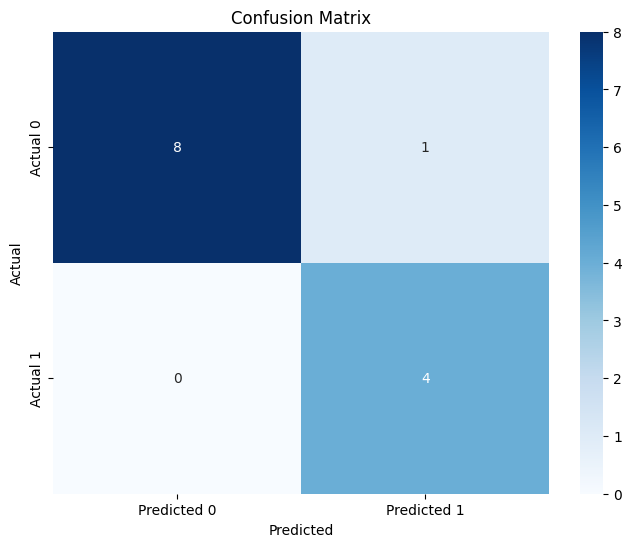

In [ ]:
# prompt: confusion matrix

import matplotlib.pyplot as plt
# Assuming 'y_test' and 'logreg_pred' (or predictions from any other model) are defined
# from the previous code

# Confusion Matrix
cm = confusion_matrix(y_test, logreg_pred)  # Replace logreg_pred with your model's predictions

# Visualize Confusion Matrix using seaborn
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues",
            xticklabels=['Predicted 0', 'Predicted 1'],
            yticklabels=['Actual 0', 'Actual 1'])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()
